# Montu Python 
## Astronomical ephemerides for the Ancient World
## Example: Compute *Montunctions*


## Goals of this notebook

The goal of this notebook is to determine the stable positions of mars across ancient Egypt history and check when this *marsticies* happened close to the winter solstice and in the Taurus constellation.

## Loading tools

We need to load the packages and the required data for it (star database, planet position database, etc.):

In [6]:
# Montu packages and data
from montu import *

# External packages
from pyplanets.planets.mars import Mars

# Load planetary data
Montu.load_kernels(PRECISION_KERNELS)

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## *Marstices*

Lets set observing conditions and initial time of exploration:

In [2]:
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)

Our target body:

In [3]:
mars = PlanetaryBody('Mars')

Now let's predict all the Marstices in the century from -1400 to -1500:

In [4]:
from pyplanets.planets.mars import Mars
marstices = pd.DataFrame()
i = 0

"""
PAY ATTENTION:
For doing this I modified a conditional in the file pyplanets/mars/mars.py, class Mars
routines station_longitude_1 and station_longitude_2
"""

# Range of years
#"""
initial_year = -2500
final_year = -500
#"""
"""
initial_year = 1700
final_year = 2023
#"""

mars.reset_store()
mtime = MonTime(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')
while True:
    epoch1 = Mars(mtime.obj_pyplanet).station_longitude_1()
    epoch2 = Mars(mtime.obj_pyplanet).station_longitude_2()
    
    mtime1 = MonTime(float(epoch1),format='jd',calendar='mixed')
    mtime2 = MonTime(float(epoch2),format='jd',calendar='mixed')

    # Stopping condition
    if mtime2.year > final_year:
        break

    # Data marstice
    marstice = pd.DataFrame(dict(
        datepro = [mtime1.datepro,mtime2.datepro],
        datemix = [mtime1.datemix,mtime2.datemix],
        type = ['first','second'],
        jed = [mtime1.jed,mtime2.jed],
    ))

    # Append marstice to table
    marstices = pd.concat([marstices,marstice])

    # Advance 2 years for next marstice
    mtime = mtime + 2*YEAR
    i += 1

marstices.drop_duplicates(inplace=True)
marstices.reset_index(drop=True,inplace=True)
marstices

,datepro,datemix,type,jed
0,-2501-12-11 14:18:00.6472,-2500-01-01 14:18:18,first,8.07933095840819995e+05
1,-2500-02-28 11:01:33.4748,-2500-03-20 11:01:01,second,8.08011959415219957e+05
2,-2498-01-29 15:29:56.8405,-2498-02-18 15:29:29,first,8.08712145796759985e+05
3,-2498-04-12 10:24:46.7277,-2498-05-02 10:24:24,second,8.08784933874160051e+05
4,-2496-04-10 00:28:03.2910,-2496-04-30 00:28:28,first,8.09513519482539967e+05
...,...,...,...,...
1869,-0506-09-04 21:49:24.4975,-506-09-10 21:49:49,second,1.53649440931130992e+06
1870,-0504-08-30 13:09:38.6190,-504-09-05 13:09:09,first,1.53722004836364998e+06
1871,-0504-11-10 12:33:59.5297,-504-11-16 12:34:34,second,1.53729202360567008e+06
1872,-0502-10-10 16:51:05.9591,-502-10-16 16:51:51,first,1.53799120215229993e+06


Now we want to add to this information other relevant astronomical information:

1. Position of mars in the sky
2. Date of occurrence of winter solstices
3. Angular distance of Mars to Aldebaran

Position of Mars in the sky:

In [5]:
mars.reset_store()
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

100%|██████████| 1874/1874 [00:05<00:00, 324.14it/s]


Positions are stored in a separate dataframe:

In [7]:
mars_marstices = copy.deepcopy(mars.df)
mars_marstices

,datepro,datemix,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,RAEpoch,DecEpoch,...,LatEpoch_SPICE,tsa_SPICE,HA_SPICE,az_SPICE,el_SPICE,site_distance_SPICE,sun_distance_SPICE,elongation_SPICE,phase_SPICE,mag_SPICE
0,-2501-12-11 14:18:00.6469,-2500-01-01 14:18:18,-2501-12-11T14:18:00.646900,-1.42008008819673157e+11,8.07933786809340003e+05,8.07933095840819995e+05,12.68993407231011439,-0.20377110381775987,8.72817082261327037,22.67161335199910965,...,3.94947225374425459,21.80024600426893144,13.07207518165566107,19.72805637885767638,-40.78287974410142169,0.78867190943174681,1.64032723324126017,134.29827147756762429,25.57386649598465667,-0.69999999999999996
1,-2500-02-28 11:01:33.4750,-2500-03-20 11:01:01,-2500-02-28T11:01:33.475000,-1.42001195006845001e+11,8.08012650383739965e+05,8.08011959415219957e+05,11.55880887683493441,6.77553878497177120,7.40966249609703009,26.00798939191453130,...,3.44210985316405926,23.70818014468886759,16.29851764859183660,55.46741753728633739,-10.10187554342696181,0.71762442482292066,1.57012465932716294,129.57422557382923856,29.79810922545270202,-1.00000000000000000
2,-2498-01-29 15:29:56.8401,-2498-02-18 15:29:29,-2498-01-29T15:29:56.840100,-1.41940698958763153e+11,8.08712836125429953e+05,8.08712145796759985e+05,15.35842123171231144,-15.32402668550840019,11.46697467051499153,7.33927138820243563,...,3.47782497424580450,2.19058062948412768,14.72360595896913615,56.96854456352665608,-39.29890291027356142,0.64522881650539365,1.55483316571669361,140.07377335186231448,24.47986276960657293,-1.30000000000000004
3,-2498-04-12 10:24:46.7274,-2498-05-02 10:24:24,-2498-04-12T10:24:46.727400,-1.41934410068875793e+11,8.08785624202830018e+05,8.08784933874160051e+05,14.28928425767291621,-13.09986105651474553,10.43625701957103047,11.02687307774777992,...,0.91670411814411012,1.88730967247689918,15.45105265290586871,61.31693678750473708,-28.49866736116144494,0.56034677837273550,1.46576579957220776,134.35346144662736378,29.78267926906454477,-1.69999999999999996
4,-2496-04-10 00:28:03.2915,-2496-04-30 00:28:28,-2496-04-10T00:28:03.291500,-1.41871460327569366e+11,8.09514209171650000e+05,8.09513519482539967e+05,19.72551939085374073,-23.30403264420766263,15.23439153371894328,-19.86506368486054086,...,-1.38579752215638030,15.81726983242285556,0.58287829870391228,191.72996552769632217,45.31549932054011265,0.45730871565364556,1.42227817401423207,146.58600325131149589,23.21526000436100645,-2.20000000000000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,-0506-09-04 21:49:24.4972,-506-09-10 21:49:49,-506-09-04T21:49:24.497200,-7.90603537426196289e+10,1.53649460946041998e+06,1.53649440931130992e+06,23.00526618884532937,-11.67991392260648098,20.71513319541944398,-23.41541083530939815,...,-4.79209438015785327,22.92355184716236494,2.20841865174292096,216.58498691212429321,32.71260242940560659,0.47676974338861627,1.41330570887814644,144.96064698402886961,23.87160507298115064,-2.20000000000000018
1870,-0504-08-30 13:09:38.6194,-504-09-05 13:09:09,-504-08-30T13:09:38.619400,-7.89976585582574463e+10,1.53722024816831993e+06,1.53722004836364998e+06,3.77171501208193316,17.26588207961963306,1.51479203486960690,6.58673637867916462,...,-2.84286486535485405,13.94255265745542616,12.42776062258581860,12.36719872991045222,-58.77908726378556281,0.57264568012665162,1.45184950980091187,133.36262044589474840,29.97354229367419265,-1.69999999999999996
1871,-0504-11-10 12:33:59.5299,-504-11-16 12:34:34,-504-11-10T12:33:59.529900,-7.89914398973469086e+10,1.53729222341034003e+06,1.53729202360567008e+06,2.61429838427806827,15.73689895114963200,0.42326550205895763,2.97310167814811122,...,0.17083594217006021,18.07781121033195859,17.65454570827300174,85.16842640401803521,-3.51448597875703106,0.66612515428564456,1.54124197269379049,137.55349312208994661,25.48718887563244806,-1.19999999999999996
1872,-0502-10-10 16:51:05.9587,-502-10-16 16:51:51,-502-10-10T16:51:05.958700,-7.89310309006524963e+10,1.53799140161282010e+06,1.537

Compute the date of the previous and next winter solstice, and the days elapsed to the closest one:

In [8]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate next and previous solstices
    prev_equinoxes_solstices = MonTime.previous_equinoxes_solstices(mtime)
    next_equinoxes_solstices = MonTime.next_equinoxes_solstices(mtime)

    # Get the closest solstice
    closest_solstice = min(abs(mtime.jed - prev_equinoxes_solstices[3]),
                           abs(mtime.jed - next_equinoxes_solstices[3]))

    # Add winter solstice to DataFrame
    marstices.loc[index,'closest_solstice'] = closest_solstice

marstices
    

100%|██████████| 1874/1874 [00:04<00:00, 423.15it/s]


,datepro,datemix,type,jed,closest_solstice
0,-2501-12-11 14:18:00.6472,-2500-01-01 14:18:18,first,8.07933095840819995e+05,8.25253635423723608
1,-2500-02-28 11:01:33.4748,-2500-03-20 11:01:01,second,8.08011959415219957e+05,70.61103804619051516
2,-2498-01-29 15:29:56.8405,-2498-02-18 15:29:29,first,8.08712145796759985e+05,40.30559689318761230
3,-2498-04-12 10:24:46.7277,-2498-05-02 10:24:24,second,8.08784933874160051e+05,113.09367429325357080
4,-2496-04-10 00:28:03.2910,-2496-04-30 00:28:28,first,8.09513519482539967e+05,111.19428980373777449
...,...,...,...,...,...
1869,-0506-09-04 21:49:24.4975,-506-09-10 21:49:49,second,1.53649440931130992e+06,106.88802556181326509
1870,-0504-08-30 13:09:38.6190,-504-09-05 13:09:09,first,1.53722004836364998e+06,111.73748635337688029
1871,-0504-11-10 12:33:59.5297,-504-11-16 12:34:34,second,1.53729202360567008e+06,39.76224433328025043
1872,-0502-10-10 16:51:05.9591,-502-10-16 16:51:51,first,1.53799120215229993e+06,71.06271625775843859


Now we want to compute the angular distance to Aldebaran. For this purpose, we need to get the information about the star from the database:

In [9]:
aldebaran = ALL_STARS.get_stars(ProperName='Aldebaran')
aldebaran.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
15107,15108,21421,29139.0,1457.0,Gl 171.1A,87Alp Tau,Aldebaran,4.59866679000000023,16.50976164000000068,19.96406468356959962,0.87,-0.63124484155242799,K5III,1.53800000000000003


Now we will compute for each marstice, the angular distance to Aldebaran:

In [11]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):

    # Get marstice information and location of mars
    marstice = marstices.loc[index]
    mars_location = mars_marstices.loc[index]

    # un commente to check
    """
    print(marstice.jed,marstice.datemix)
    print(D2H(mars_location.DecJ2000),D2H(mars_location.RAJ2000))
    print(D2H(float(aldebaran.data.Dec)),D2H(float(aldebaran.data.RA)))
    print(angdist)
    break
    """

    # Compute angular distance
    aldebaran_angdist = Montu.haversine_distance(mars_location.DecJ2000*DEG,15*mars_location.RAJ2000*DEG,
                                       float(aldebaran.data.DecJ2000)*DEG,15*float(aldebaran.data.RAJ2000)*DEG)*RAD
    
    # Angular distance
    marstices.loc[index,'aldebaran_angdist'] = aldebaran_angdist

marstices

100%|██████████| 1874/1874 [00:00<00:00, 4351.95it/s]


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist
0,-2501-12-11 14:18:00.6472,-2500-01-01 14:18:18,first,8.07933095840819995e+05,8.25253635423723608,120.00621249179818051
1,-2500-02-28 11:01:33.4748,-2500-03-20 11:01:01,second,8.08011959415219957e+05,70.61103804619051516,101.72873532352109294
2,-2498-01-29 15:29:56.8405,-2498-02-18 15:29:29,first,8.08712145796759985e+05,40.30559689318761230,162.07667440849820650
3,-2498-04-12 10:24:46.7277,-2498-05-02 10:24:24,second,8.08784933874160051e+05,113.09367429325357080,146.37641923342286532
4,-2496-04-10 00:28:03.2910,-2496-04-30 00:28:28,first,8.09513519482539967e+05,111.19428980373777449,135.56553632295955936
...,...,...,...,...,...,...
1869,-0506-09-04 21:49:24.4975,-506-09-10 21:49:49,second,1.53649440931130992e+06,106.88802556181326509,87.57987287226910667
1870,-0504-08-30 13:09:38.6190,-504-09-05 13:09:09,first,1.53722004836364998e+06,111.73748635337688029,11.89133565321547614
1871,-0504-11-10 12:33:59.5297,-504-11-16 12:34:34,second,1.53729202360567008e+06,39.76224433328025043,28.57948767304280580
1872,-0502-10-10 16:51:05.9591,-502-10-16 16:51:51,first,1.53799120215229993e+06,71.06271625775843859,33.38638429093342097


Now we will mark the marstices according to closest solstice and aldebaran angular distance:

In [12]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

Number of marstices close to solstices:  196
Number of marstices close to Aldebaran:  163
Number of Montunctions:  24


These are the dates:

In [13]:
montunctions = marstices.loc[marstices.montunctions]
montunctions

,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
587,-1875-12-05 17:02:31.2014,-1875-12-21 17:02:02,second,1.03656921008334996e+06,14.31683956307824701,13.64307261487061496,True,True,True
779,-1670-12-06 11:15:36.6257,-1670-12-20 11:15:15,second,1.11144396917391010e+06,14.38198851677589118,11.63520634205166715,True,True,True
853,-1591-12-08 17:38:14.0820,-1591-12-22 17:38:38,second,1.14030123488520994e+06,11.33330099959857762,13.15529199368817004,True,True,True
927,-1512-12-10 23:40:17.2521,-1512-12-24 23:40:40,second,1.16915848631079006e+06,8.28225413896143436,14.72220841599701124,True,True,True
971,-1465-12-06 03:30:47.8430,-1465-12-19 03:30:30,second,1.18631864638706995e+06,14.54971300740726292,9.84821383974513331,True,True,True
1045,-1386-12-09 10:46:27.7587,-1386-12-21 10:46:46,second,1.21517594893238996e+06,11.44790763524360955,11.17757886505697762,True,True,True
1119,-1307-12-11 17:38:51.2603,-1307-12-23 17:38:38,second,1.24403323531551007e+06,8.36272503086365759,12.65208489789148416,True,True,True
1163,-1260-12-05 17:34:40.4116,-1260-12-16 17:34:34,second,1.26119323241216992e+06,14.79368784232065082,8.45488437075584720,True,True,True
1193,-1228-12-15 00:09:03.5070,-1228-12-26 00:09:09,second,1.27289050629058992e+06,5.29490109789185226,14.19803691539296331,True,True,True
1237,-1181-12-09 01:49:11.3989,-1181-12-20 01:49:49,second,1.29005057582637994e+06,11.65591349150054157,9.46376261168630961,True,True,True


## Periodicity of marstices and montunctions

Now we want to calculate the periodicities of Marstices and Montunctions by calculating the difference in time between consecutive phenomena.

### Setting parameters for winter marstices, aldebaran conjunctions and montunctions

In [14]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

montunctions = marstices.loc[marstices.montunctions]

Number of marstices close to solstices:  196
Number of marstices close to Aldebaran:  163
Number of Montunctions:  24


### Periodicity of marstices

In [15]:
times = marstices.jed.to_numpy()
delta1 = times[2::2]-times[:-2:2]
delta2 = times[1::2]-times[:-1:2]

Histogram of times:

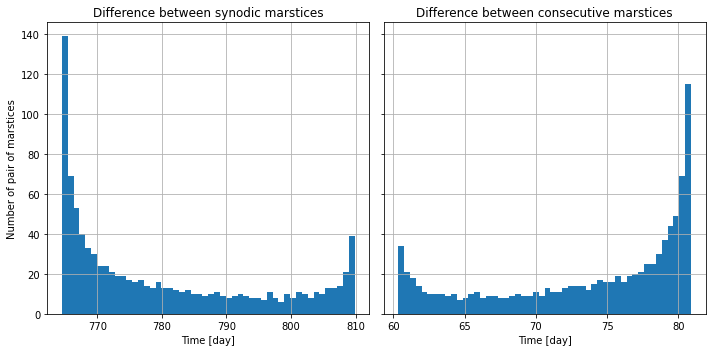

In [16]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)

ax = axs[0]
hs1 = ax.hist(delta1,bins=50)
ax.set_xlabel("Time [day]")
ax.set_ylabel("Number of pair of marstices")
ax.set_title("Difference between synodic marstices")
ax.grid()

ax = axs[1]
hs2 = ax.hist(delta2,bins=50)
ax.set_title("Difference between consecutive marstices")
ax.set_xlabel("Time [day]")
ax.grid()

fig.tight_layout()

In [17]:
print(f"Periodicity of synodic marstices: {hs1[1][0]:.1f} - {hs1[1][-1]:.1f}")
print(f"Periodicity of consecutive marstices: {hs2[1][0]:.1f} - {hs2[1][-1]:.1f}")


Periodicity of synodic marstices: 764.5 - 809.9
Periodicity of consecutive marstices: 60.3 - 80.9


### Periodicity of winter marstices

Let's extract the winter marstices:

In [18]:
winter_marstices = marstices[marstices.close_solstice]
len(winter_marstices)

196

Let's get the periodicity:

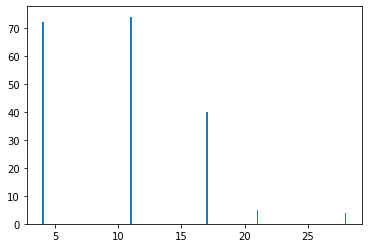

In [19]:
times = winter_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=200)


Get the periodicities:

In [20]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [11.016257598251313  4.035079618809115 17.034514477080794
 21.00656401710825  27.98774199655045 ]


### Periodicity of Aldebaran conjunctions

Let's extract the Aldebaran conjunctions:

In [21]:
aldebaran_marstices = marstices[marstices.close_aldebaran]
len(aldebaran_marstices)

163

Let's get the periodicity:

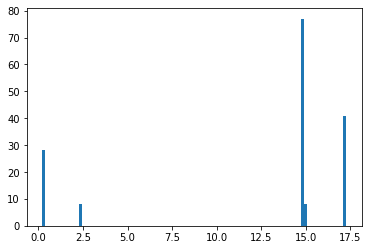

In [22]:
times = aldebaran_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=100)


Get the periodicities:

In [23]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [14.803308748390453   17.193895746372085    0.28903054635914416
 14.974064962531997    2.3381051160576822 ]


### Periodicity of Montunctions

Let's extract the Aldebaran conjunctions:

In [25]:
len(montunctions)

24

Let's get the periodicity:

Text(0, 0.5, 'Number of Montunctions')

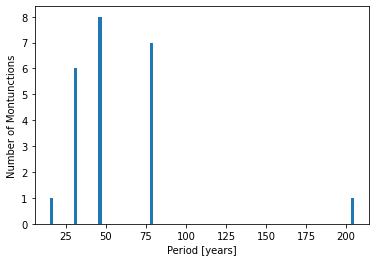

In [26]:
times = montunctions.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=100)
plt.xlabel("Period [years]")
plt.ylabel("Number of Montunctions")


Get the periodicities:

In [27]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of Montunctions [years]: ", Ps)

Periods of Montunctions [years]:  [ 46.31123293251623   78.6182945859091    31.107909801507827
 204.0457104167285    15.904586670499416]


## Lines chart of marstices and montunctions

In [28]:
# Selection of marstices
selection = marstices.loc[:]
nmarstices = len(selection)

jed_min = (1-1e-3)*selection.jed.min()
jed_max = (1+1e-3)*selection.jed.max()

# Number of panels
npanels = 6
delta_jed = (jed_max - jed_min)/npanels

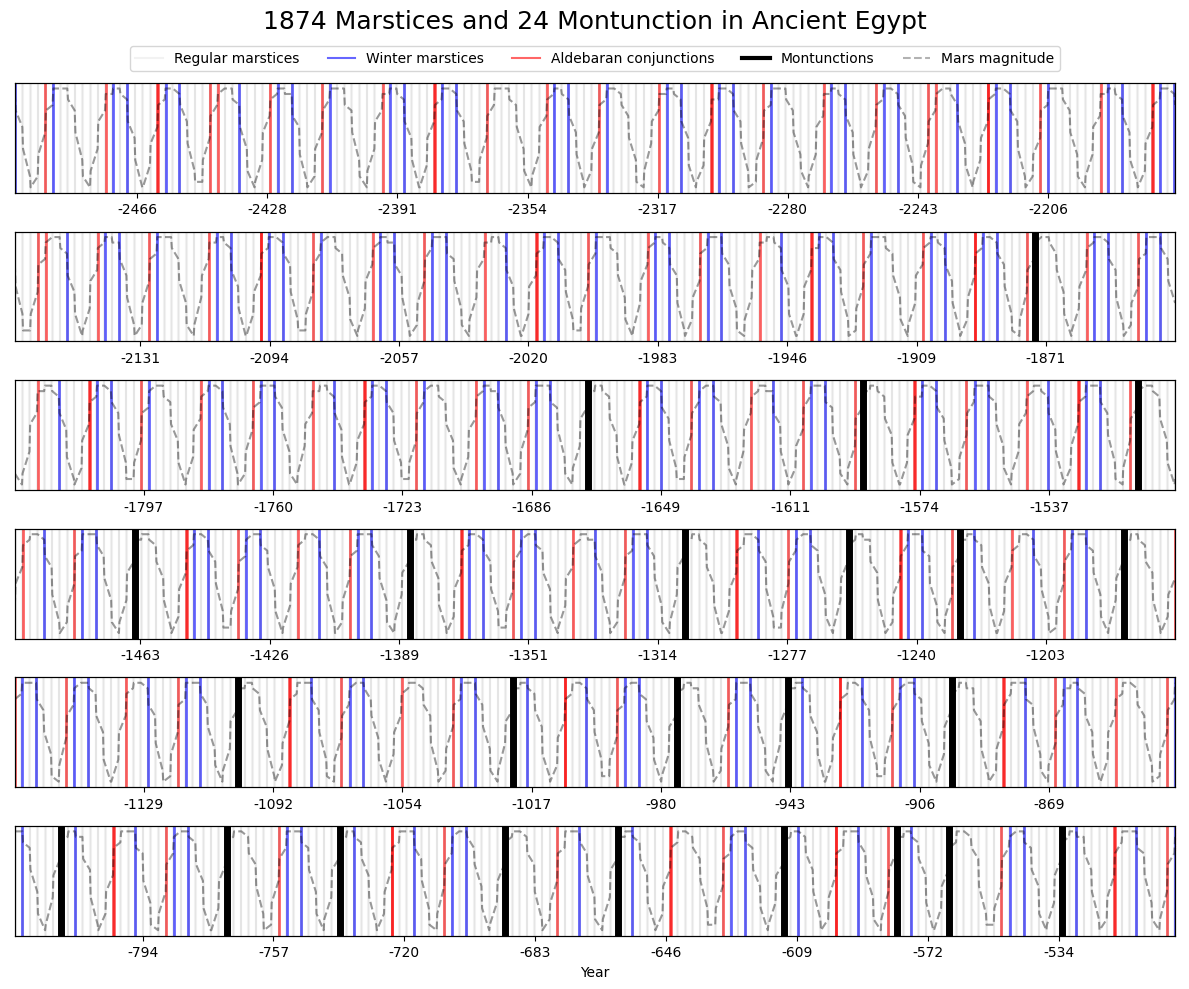

In [41]:
fig,axs = plt.subplots(npanels,1,figsize=(12,10))

axts = []
for ax in axs:
    axts += [ax.twinx()]

alpha_marst = 0.05
alpha_wmarst = 0.6
alpha_aldeb = 0.6
alpha_montu = 1
alpha_mag = 0.3

# Loop on marstices
for index in selection.index:

    # Get marstice information and location of mars
    marstice = selection.loc[index]
    mars_location = mars_marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Get panel
    i = int(np.floor((mtime.jed - jed_min)/delta_jed))
    
    # Plot line for marstices
    axs[i].axvline(mtime.jed,color='k',alpha=alpha_marst)

    # Plot line for winter marstices
    if marstice.close_solstice:
        axs[i].axvline(mtime.jed,color='b',lw=2,alpha=alpha_wmarst)

    # Plot line for aldebaran conjunctions
    if marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='r',lw=2,alpha=alpha_aldeb)

    # Plot line for montunctions
    if marstice.close_solstice and marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='k',lw=5,alpha=alpha_montu)

# Plot distance
for i,axt in enumerate(axts):
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    cond = (marstices.jed>=jed_ax_min)&(marstices.jed<=jed_ax_max)
    #axt.plot(marstices[cond].jed,mars.df[cond].site_distance,'k',alpha=0.4)
    axt.plot(marstices[cond].jed,mars_marstices[cond].mag,'k--',alpha=0.4)
    
# Decoration
for i,ax in enumerate(axs):
    ax.margins(0)
    ax.get_yaxis().set_visible(False)
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    ax.set_xticks(np.linspace(jed_ax_min,jed_ax_max,10))
    
# Change xticks
for ax in axs:
    xticks = ax.get_xticks()
    xtick_labels = []
    for xt in xticks:
        mtime = MonTime(xt,format='jd')
        xtick_labels += [f'{mtime.year}']
    ax.set_xticklabels(xtick_labels)

for ax in axts:
    ax.margins(0)
    ax.set_yticks(np.arange(-2.5,0.0,0.5))
    ax.get_yaxis().set_visible(False)

# Legends 
axs[0].plot([],[],'k-',alpha=alpha_marst,label='Regular marstices')
axs[0].plot([],[],'b-',alpha=alpha_wmarst,label='Winter marstices')
axs[0].plot([],[],'r-',alpha=alpha_aldeb,label='Aldebaran conjunctions')
axs[0].plot([],[],'k-',alpha=alpha_montu,lw=3,label='Montunctions')
axs[0].plot([],[],'k--',alpha=alpha_mag,label='Mars magnitude')
axs[0].legend(bbox_to_anchor=(0.5,1.4),ncol=5,loc='upper center')

# Other decoration
axs[-1].set_xlabel('Year')

axs[0].text(0.5,1.5,f"{len(marstices)} Marstices and {len(montunctions)} Montunction in Ancient Egypt",
            transform=axs[0].transAxes,fontsize=18,ha='center')

Montu.montu_mark(axs[-1])
fig.tight_layout()

Magnitude at Montunctions:

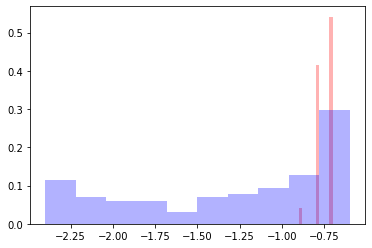

In [30]:
cond = cond_montunctions = (cond_solstices) & (cond_aldebaran)
hs = plt.hist(mars_marstices[cond].mag,color='r',alpha=0.3,
              weights=[1/len(mars_marstices[cond])]*len(mars_marstices[cond]))
hs = plt.hist(mars_marstices.mag,color='b',alpha=0.3,
              weights=[1/len(mars_marstices)]*len(mars_marstices))

## Montunctions visualization

Let's see one of this *montunctions* in the sky:

In [31]:
# Time of montunction
mtime_montunction = MonTime(montunctions.iloc[-1].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

Create a map of montunction:

Text(1, 1, 'MontuPython 0.7.1.1')

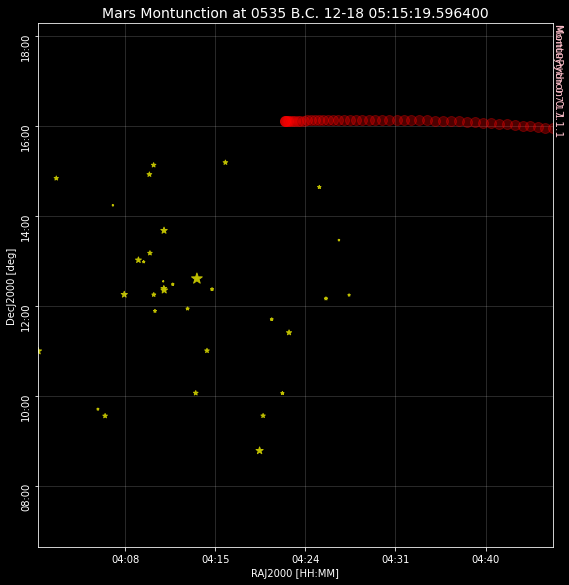

In [35]:
# Plot Hyades
hyades = ALL_STARS.get_stars_area(RA=aldebaran.data.RAJ2000,Dec=aldebaran.data.DecJ2000,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars Montunction at {mtime_montunction.datespice}",fontsize=14)
Montu.montu_mark(ax)

## Interesting montunctions

We are interested in the Montunctions happening around the date of birth or dead of Senenmut who, according to several chronologies lived between 1480bce and 1458 bce. Let's select the montunctions in this range:

In [36]:
mtime_start = MonTime('bce1480-01-01 00:00:00.00')+(-50*YEAR)
mtime_end = MonTime('bce1480-01-01 00:00:00.00')+50*YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  2


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
927,-1512-12-10 23:40:17.2521,-1512-12-24 23:40:40,second,1.16915848631079006e+06,8.28225413896143436,14.72220841599701124,True,True,True
971,-1465-12-06 03:30:47.8430,-1465-12-19 03:30:30,second,1.18631864638706995e+06,14.54971300740726292,9.84821383974513331,True,True,True


Let's see the montunctions:


Text(1, 1, 'MontuPython 0.7.1.1')

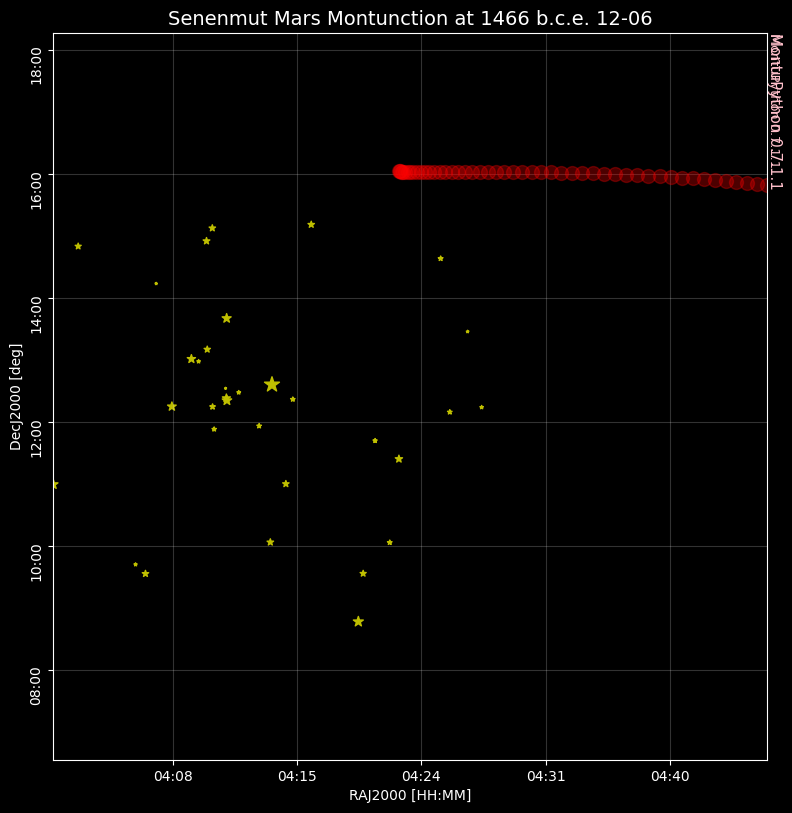

In [38]:
# Time of montunction
isel = 1
mtime_montunction = MonTime(montunctions_selected.iloc[isel].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

# Plot Hyades
hyades = ALL_STARS.get_stars_area(RA=aldebaran.data.RAJ2000,Dec=aldebaran.data.DecJ2000,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Senenmut Mars Montunction at {-mtime_montunction.year+1} b.c.e. {mtime_montunction.month:02d}-{mtime_montunction.day:02d}",fontsize=14)
Montu.montu_mark(ax)